In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : ".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
     
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
        
    return output

In [3]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [4]:
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D

### **Part b**

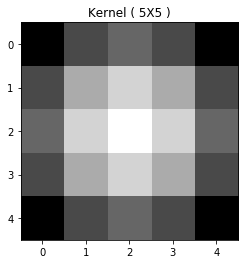

Found 3 Channels : 
Converted to Gray Channel. Size : (1024, 1024)
Kernel Shape : (5, 5)


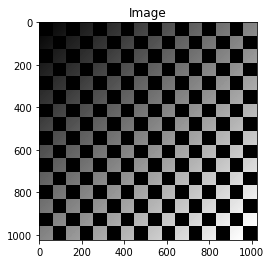

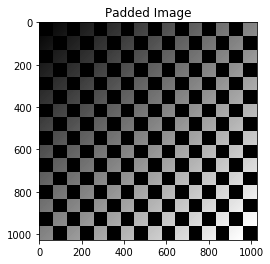

Output Image size : (1024, 1024)


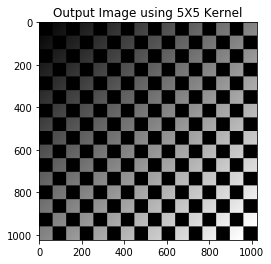

In [5]:
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)
if __name__ == '__main__':
    image = cv2.imread("checkerboard1024-shaded.tif")
    gaussian_blur(image,5, verbose=True)

*Image look almost similar but there is a difference in terms of gradient and conterast where in output image having more contrast. and look more towards black shade where as in above image it look it has more illumination than the other*

### Part c and d

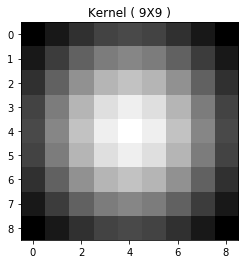

Found 3 Channels : 
Converted to Gray Channel. Size : (1024, 1024)
Kernel Shape : (9, 9)


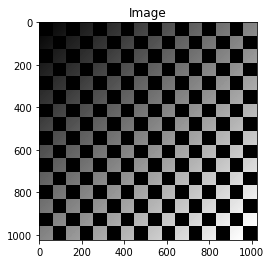

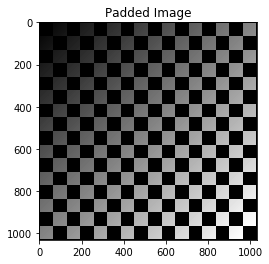

Output Image size : (1024, 1024)


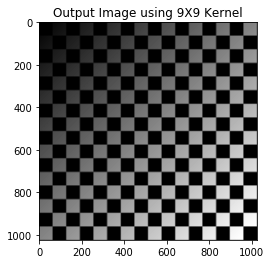

Image Shape : (1024, 1024)
Kernel Shape : (3, 3)
Output Image size : (1024, 1024)


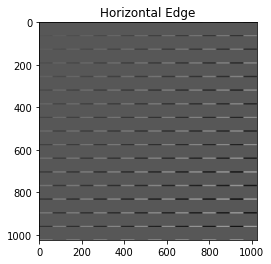

Image Shape : (1024, 1024)
Kernel Shape : (3, 3)
Output Image size : (1024, 1024)


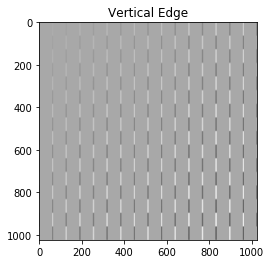

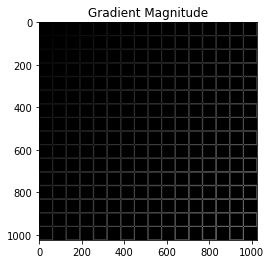

In [6]:
def sobel_edge_detection(image, filter, verbose=False):
    
    
    new_image_x = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
        
    new_image_y = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()

    
        
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()

if __name__ == '__main__':
    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
 
    image = cv2.imread("checkerboard1024-shaded.tif")
    image = gaussian_blur(image, 9, verbose=True)
    sobel_edge_detection(image, filter, verbose=True)


*Between two kernel output image the gaussian blur look more like the input image where as in sobel we look loose the informatrion about contrast and color value and look for more edge detection. Thus Sobel is an edge detection kernel and where as other kernel is used in blurring the input image.*